In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
life_expect = pd.read_csv('life_expect_birth.csv')

In [4]:
life_expect.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Year,Expectancy,Flag Codes
0,AUS,LIFEEXP,TOT,YR,A,1960,70.9,NaN
1,AUS,LIFEEXP,TOT,YR,A,1961,71.2,NaN
2,AUS,LIFEEXP,TOT,YR,A,1962,71.0,NaN
3,AUS,LIFEEXP,TOT,YR,A,1963,71.1,NaN
4,AUS,LIFEEXP,TOT,YR,A,1964,70.7,NaN


In [5]:
health_spend = pd.read_csv('health_spending_per_capita.csv')

In [6]:
health_spend.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Year,Cost,Flag Codes
0,AUS,HEALTHEXP,TOT,USD_CAP,A,1971,223.5920,NaN
1,AUS,HEALTHEXP,TOT,USD_CAP,A,1972,239.1784,NaN
2,AUS,HEALTHEXP,TOT,USD_CAP,A,1973,264.0303,NaN
3,AUS,HEALTHEXP,TOT,USD_CAP,A,1974,322.3286,NaN
4,AUS,HEALTHEXP,TOT,USD_CAP,A,1975,401.8512,NaN


In [7]:
life_expect = life_expect.filter(items= ['LOCATION', 'Year', 'Expectancy'])

In [8]:
life_expect.head()

,LOCATION,Year,Expectancy
0,AUS,1960,70.9
1,AUS,1961,71.2
2,AUS,1962,71.0
3,AUS,1963,71.1
4,AUS,1964,70.7


In [12]:
life_expect_new = life_expect[life_expect['Year'] > 1972]

In [9]:
CAN_data = life_expect[life_expect['LOCATION'] == 'CAN']
CAN_data

,LOCATION,Year,Expectancy
165,CAN,1961,71.3
166,CAN,1966,72.0
167,CAN,1971,72.9
168,CAN,1976,73.9
169,CAN,1979,75.1
170,CAN,1980,75.3
171,CAN,1981,75.5
172,CAN,1982,75.9
173,CAN,1983,76.2
174,CAN,1984,76.5


In [10]:
health_spend_new = health_spend[health_spend['Year'] > 1972]
health_spend_new = health_spend_new.filter(items= ['LOCATION', 'Year','Cost'])

In [13]:
fil = ['LOCATION', 'Year']
final_data = pd.merge(life_expect_new, health_spend_new, how= "inner", on = fil)

In [16]:
final_data.head()

,LOCATION,Year,Expectancy,Cost
0,AUS,1973,72.1,264.0303
1,AUS,1974,71.9,322.3286
2,AUS,1975,72.7,401.8512
3,AUS,1976,72.8,430.0610
4,AUS,1977,73.4,472.8991


In [48]:
year = 1961
j = 165

list_year=CAN_data["Year"].tolist()

print(list_year)

for year in range(1961,2015):
    if year not in list_year:
        print(year)
        CAN_data=CAN_data.append({'LOCATION':'CAN','Year':year}, ignore_index=True)
        
        
CAN_data

[1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972


,LOCATION,Year,Expectancy,Cost
0,CAN,1973,72.9,368.6198
1,CAN,1974,72.9,403.0845
2,CAN,1975,72.9,474.4168
3,CAN,1976,73.9,522.4715
4,CAN,1977,73.9,565.5264


In [15]:
CAN_data.sort_values('Year', inplace= True)

In [16]:
CAN_data.fillna(method = 'ffill', inplace= True)

In [17]:
CAN_data = CAN_data[CAN_data['Year'] > 1972]

In [47]:
CAN_data.head()

,LOCATION,Year,Expectancy,Cost
0,CAN,1973,72.9,368.6198
1,CAN,1974,72.9,403.0845
2,CAN,1975,72.9,474.4168
3,CAN,1976,73.9,522.4715
4,CAN,1977,73.9,565.5264


In [19]:
health_spend_new[health_spend_new['LOCATION'] == 'CAN']

,LOCATION,Year,Cost
140,CAN,1973,368.6198
141,CAN,1974,403.0845
142,CAN,1975,474.4168
143,CAN,1976,522.4715
144,CAN,1977,565.5264
145,CAN,1978,620.3476
146,CAN,1979,678.4152
147,CAN,1980,766.2398
148,CAN,1981,882.5133
149,CAN,1982,993.8850


In [20]:
CAN_data = pd.merge(CAN_data, health_spend_new[health_spend_new['LOCATION'] == 'CAN'], how= "inner", on = fil)

In [21]:
CAN_data

,LOCATION,Year,Expectancy,Cost
0,CAN,1973,72.9,368.6198
1,CAN,1974,72.9,403.0845
2,CAN,1975,72.9,474.4168
3,CAN,1976,73.9,522.4715
4,CAN,1977,73.9,565.5264
5,CAN,1978,73.9,620.3476
6,CAN,1979,75.1,678.4152
7,CAN,1980,75.3,766.2398
8,CAN,1981,75.5,882.5133
9,CAN,1982,75.9,993.8850


In [22]:
year = range(1974,2017)

In [23]:
print(year)

range(1974, 2017)


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


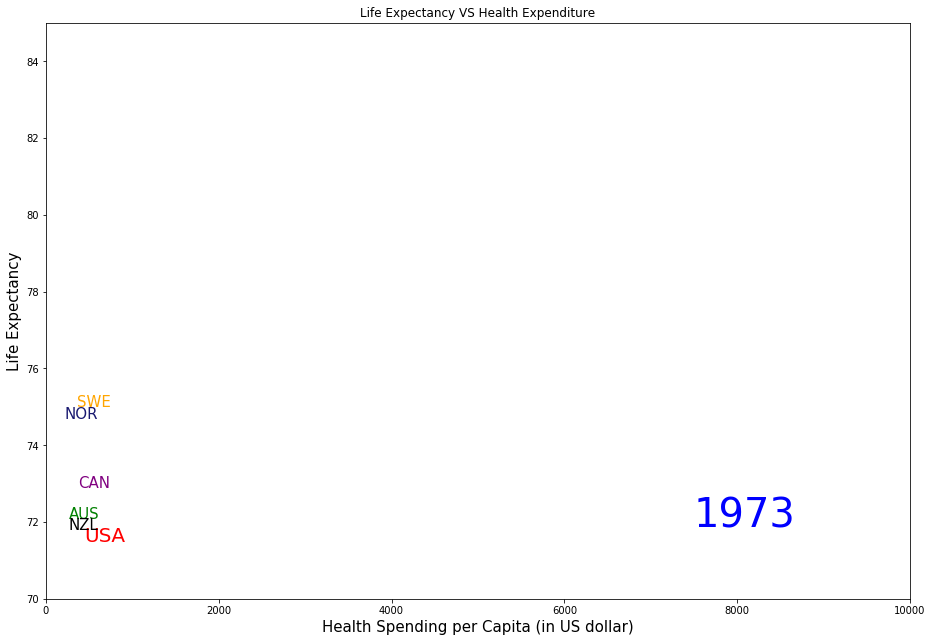

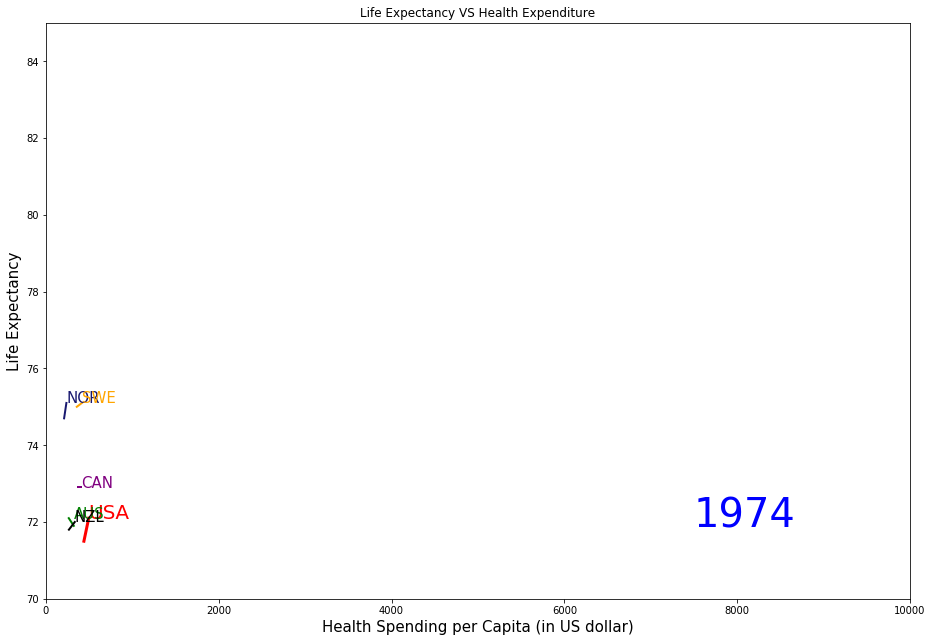

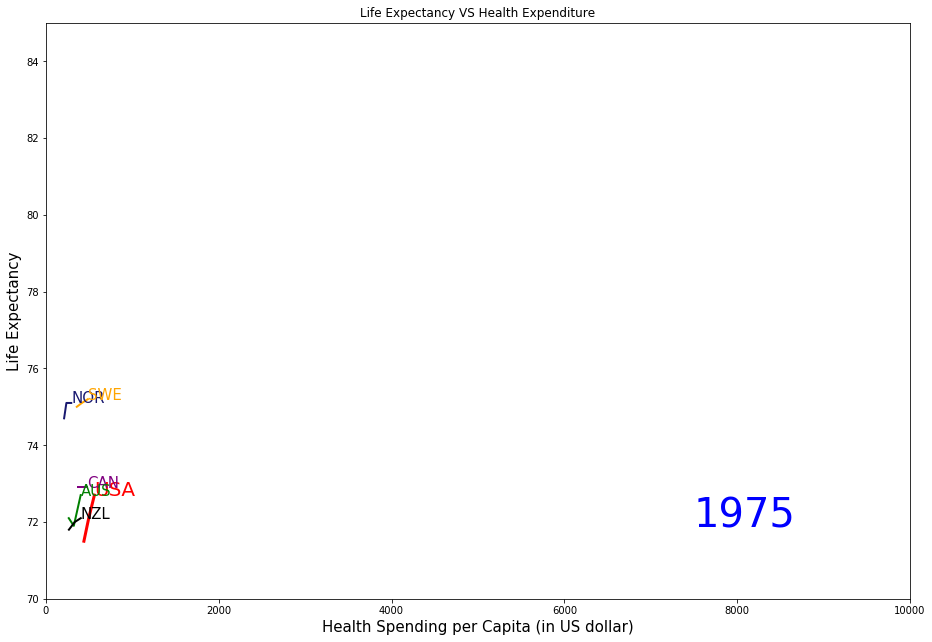

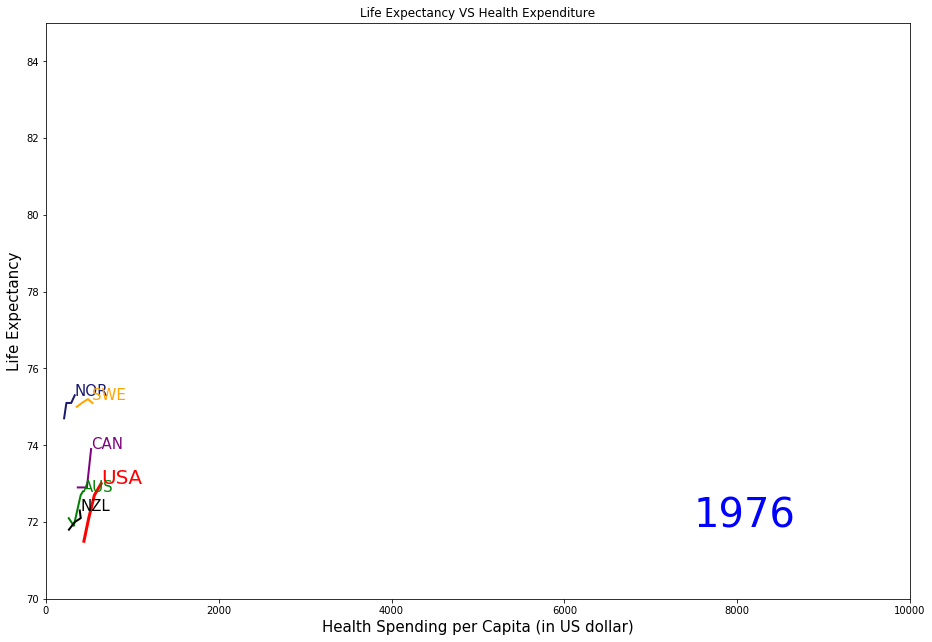

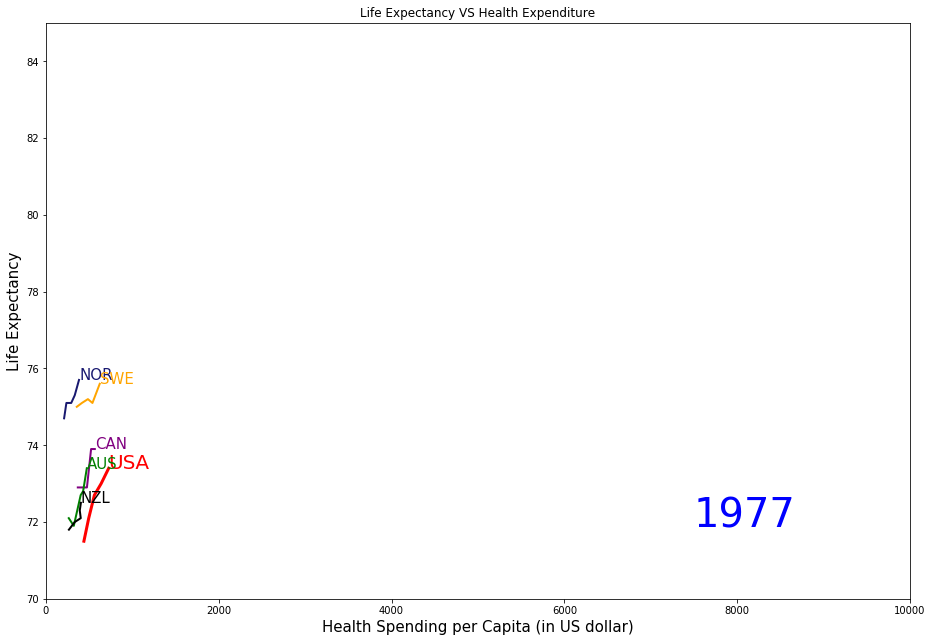

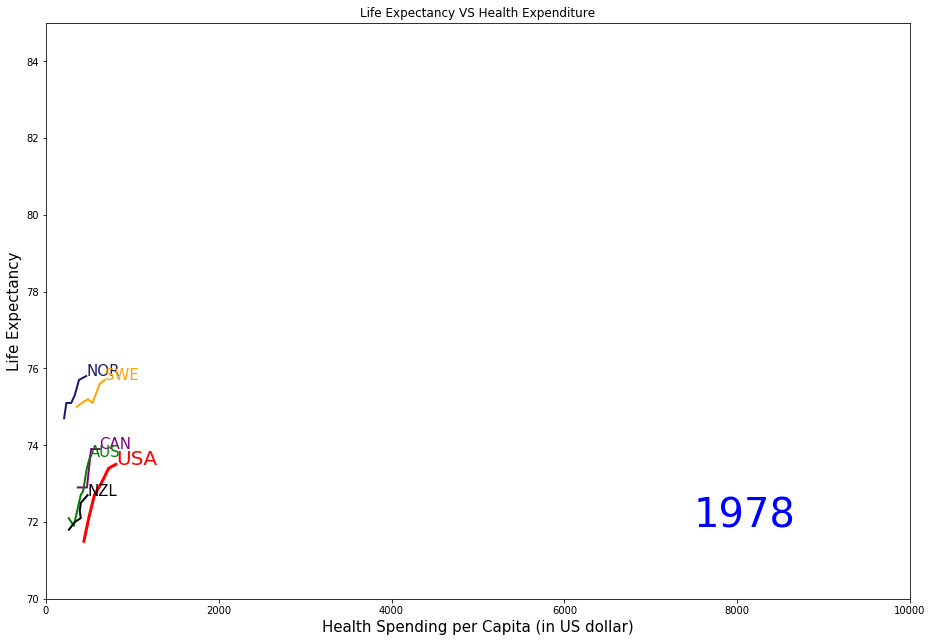

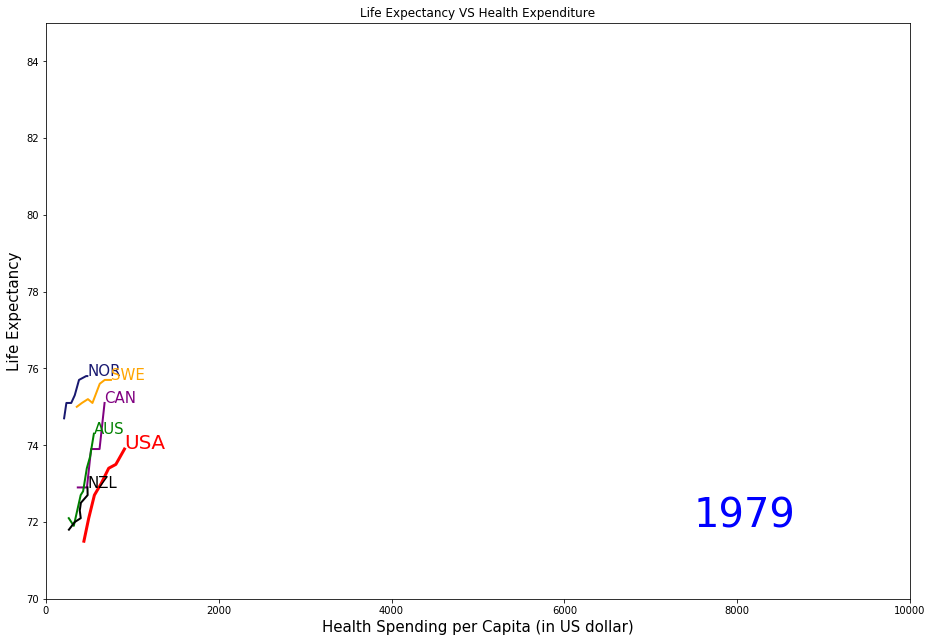

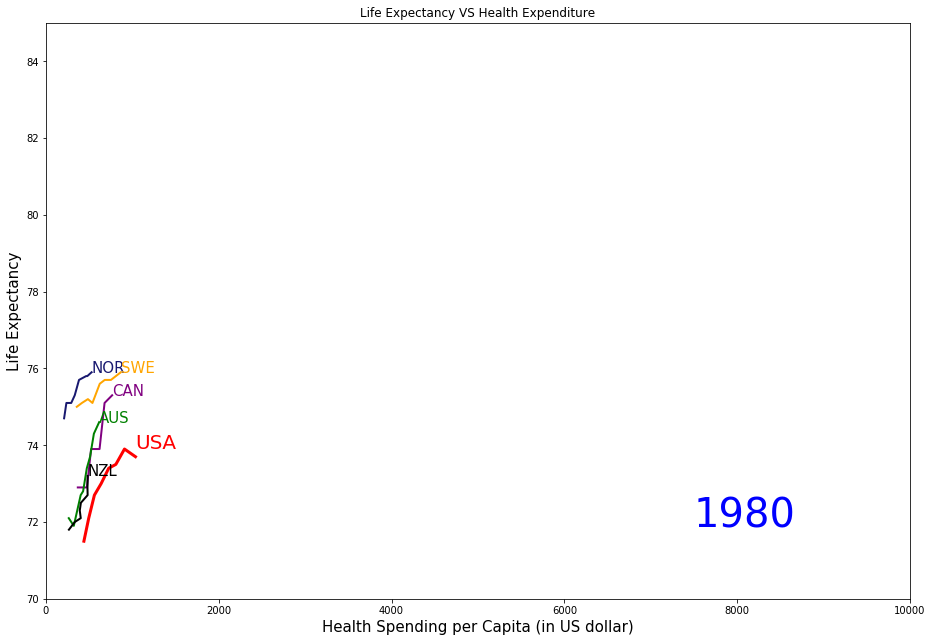

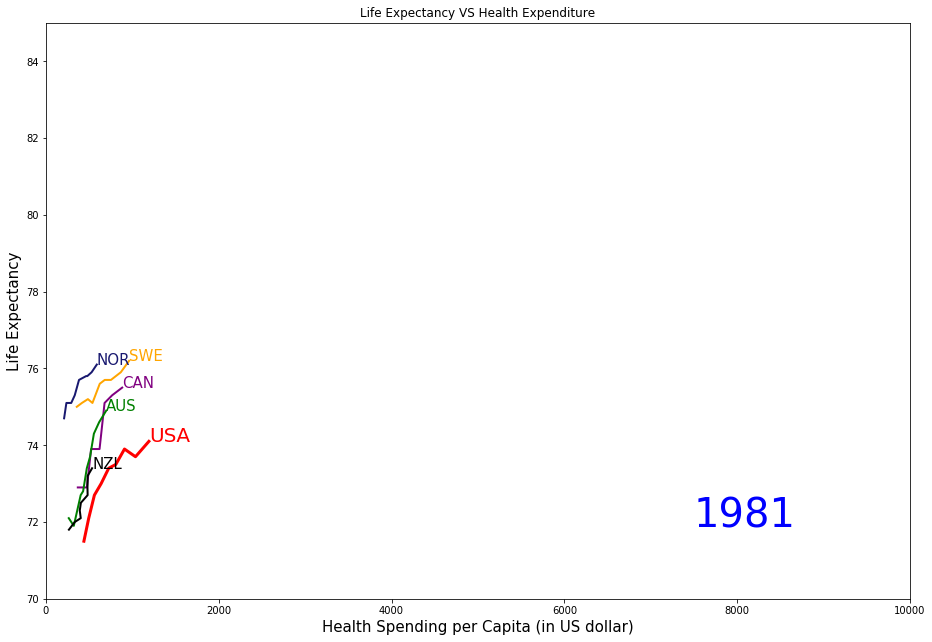

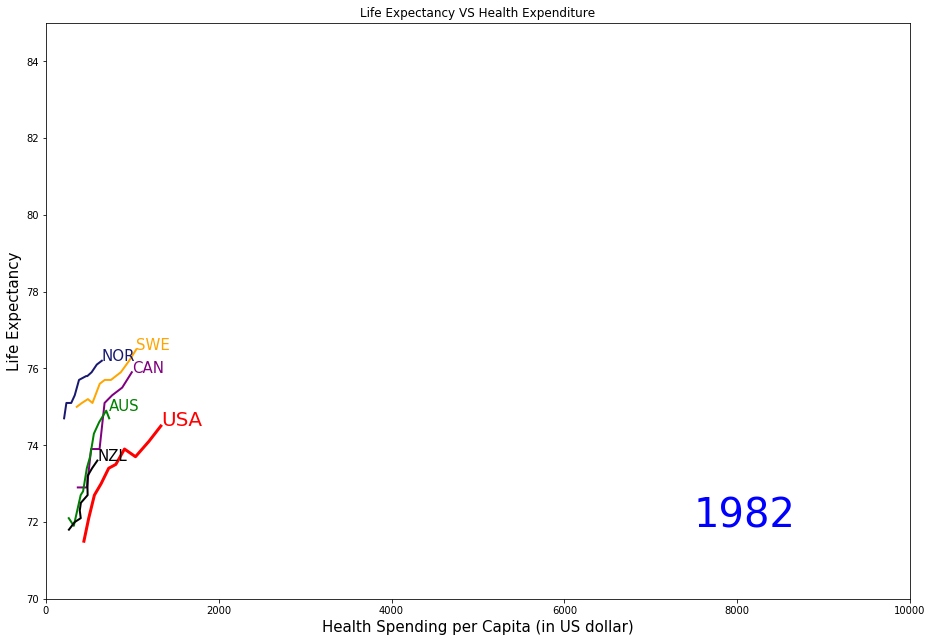

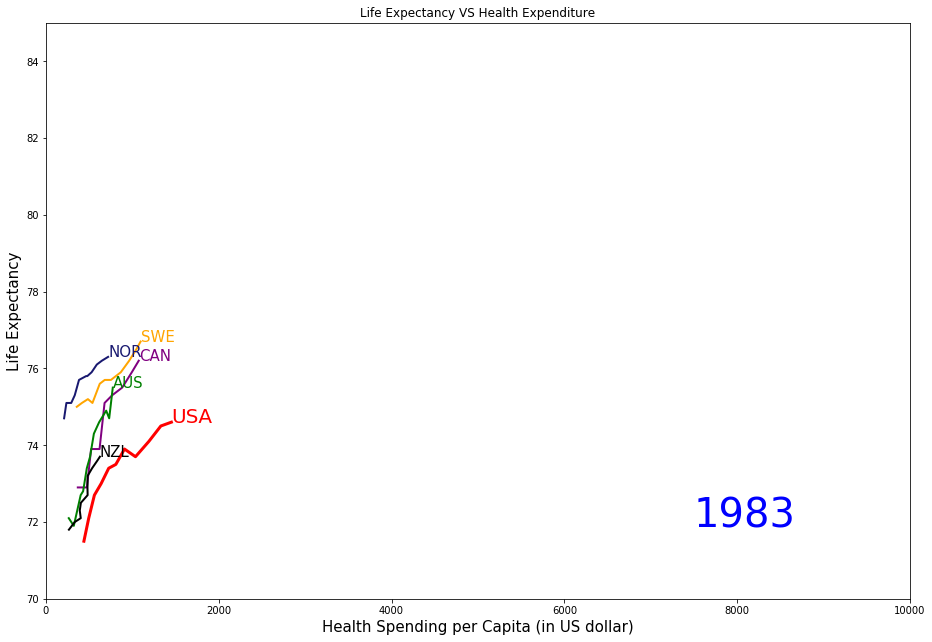

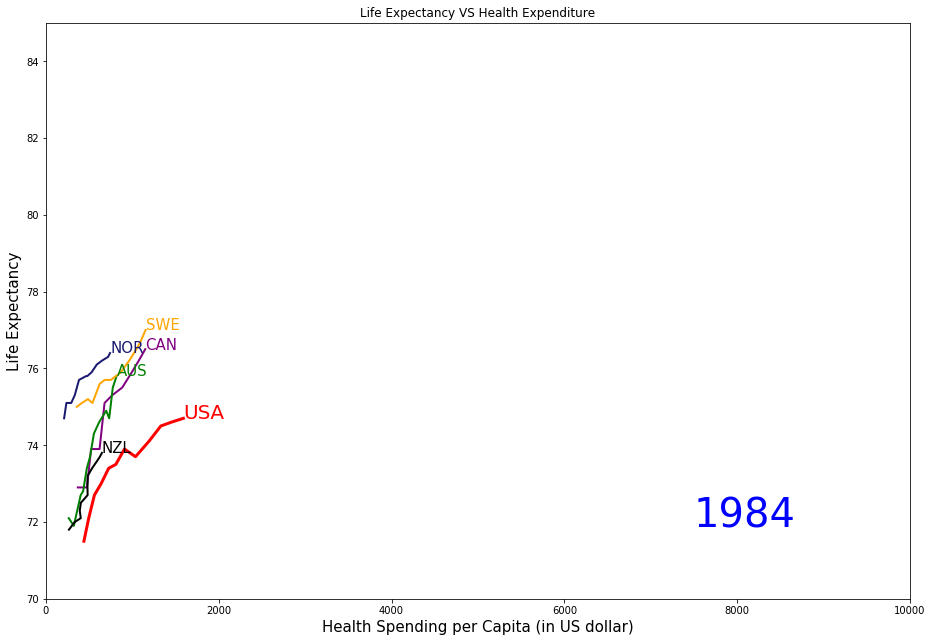

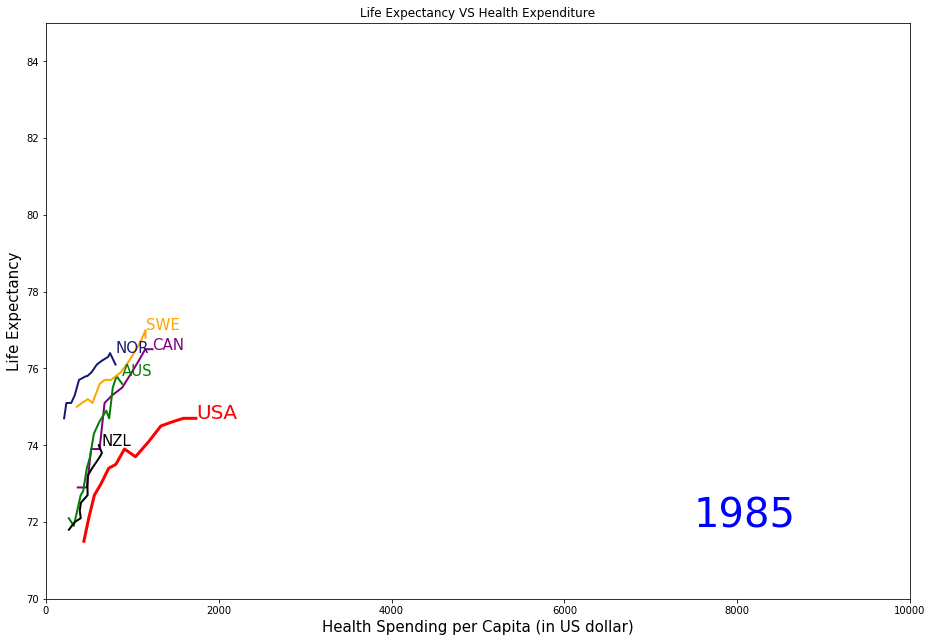

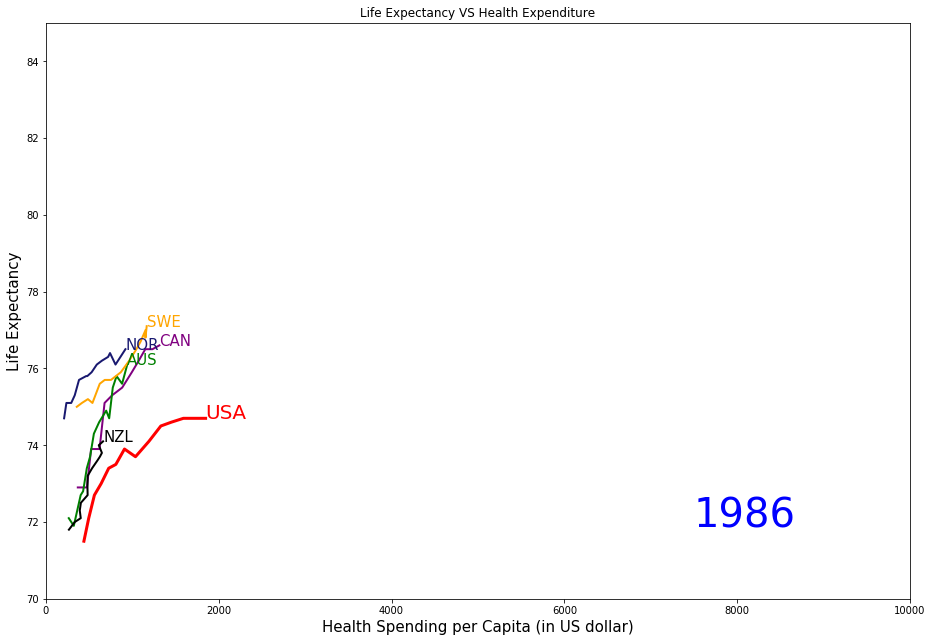

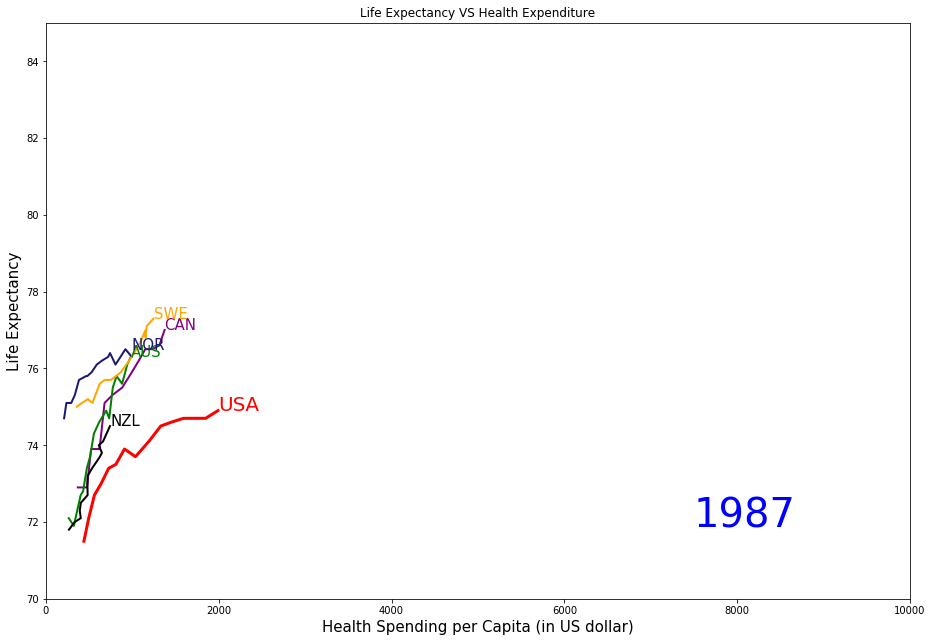

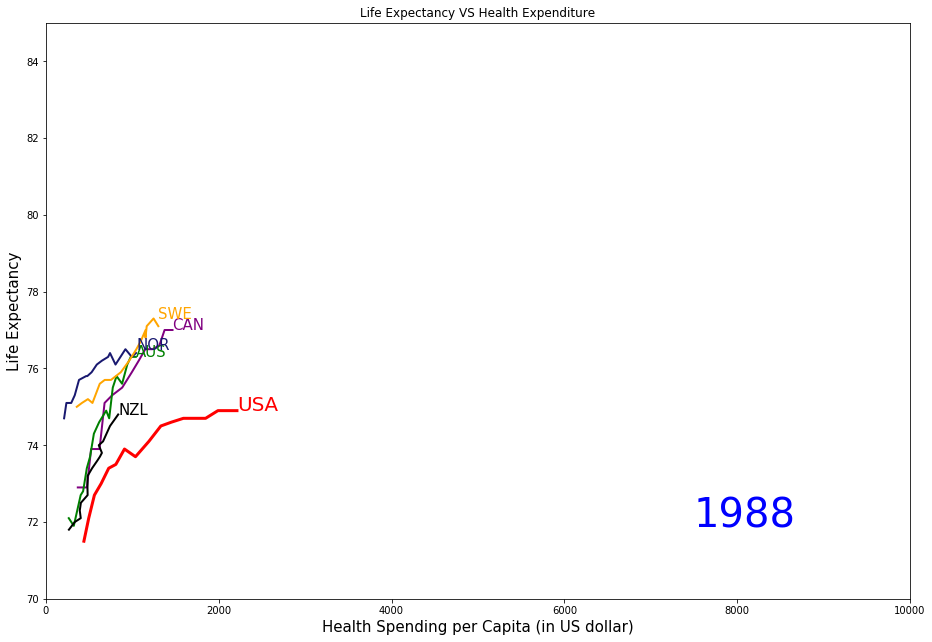

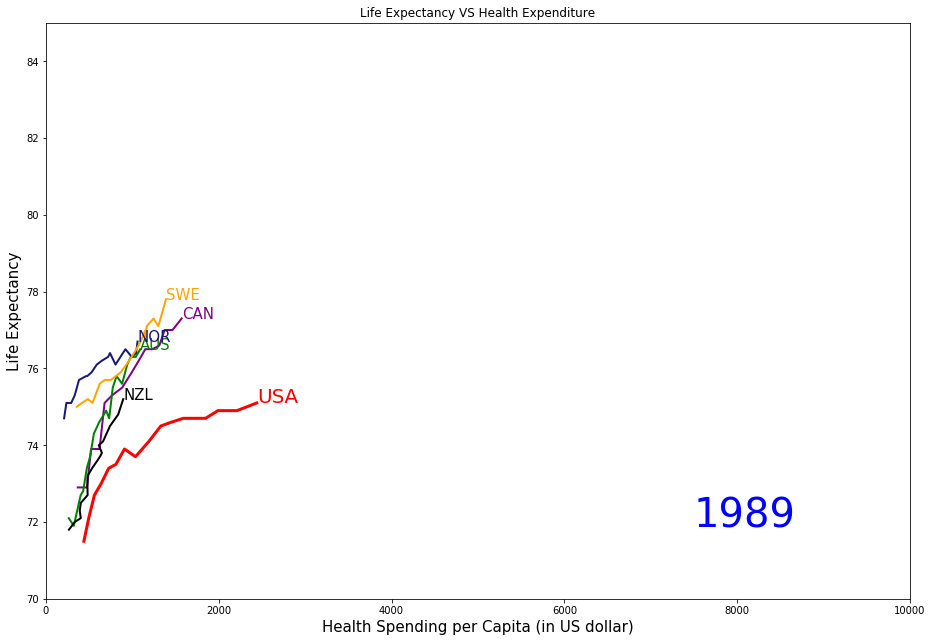

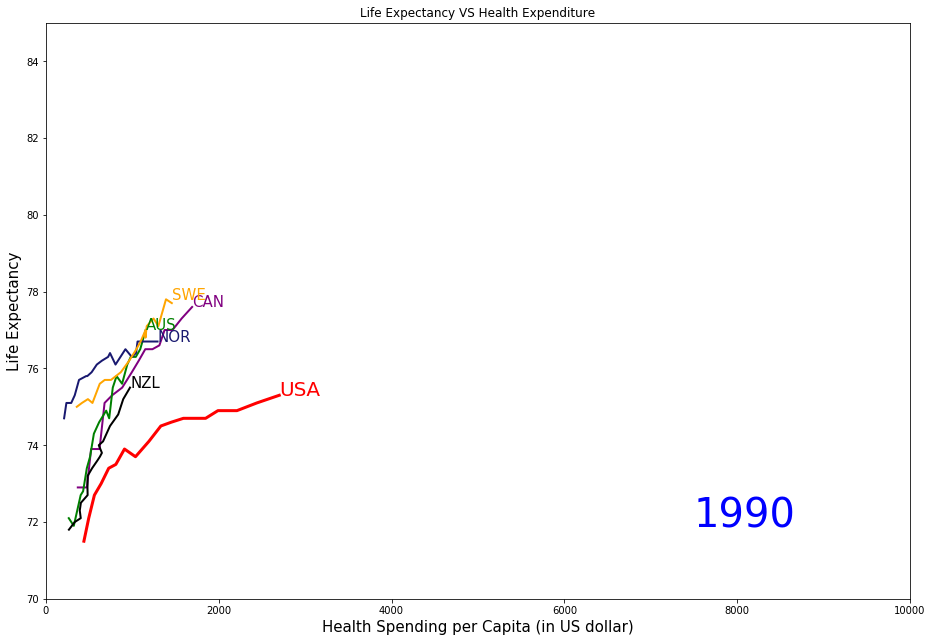

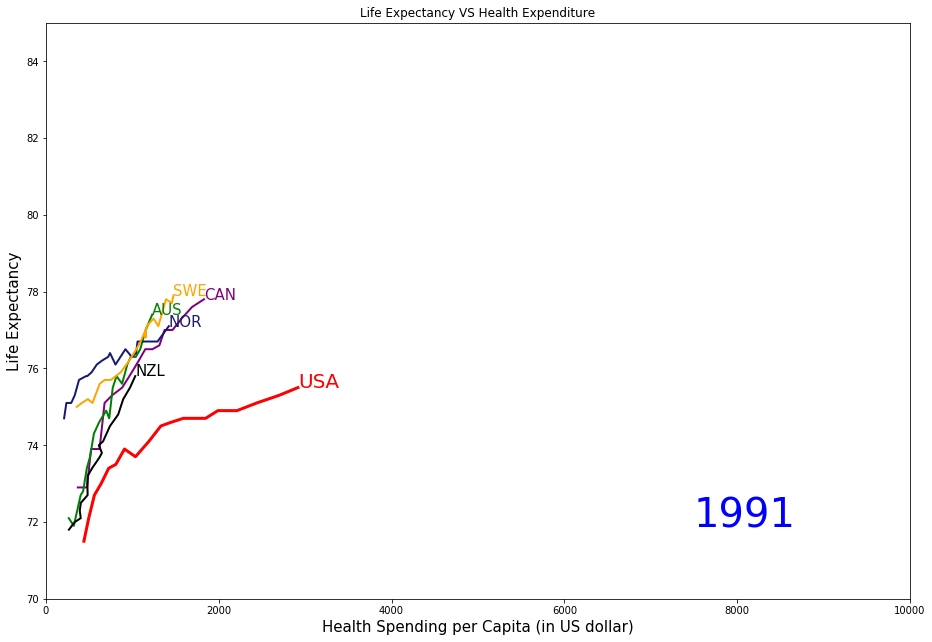

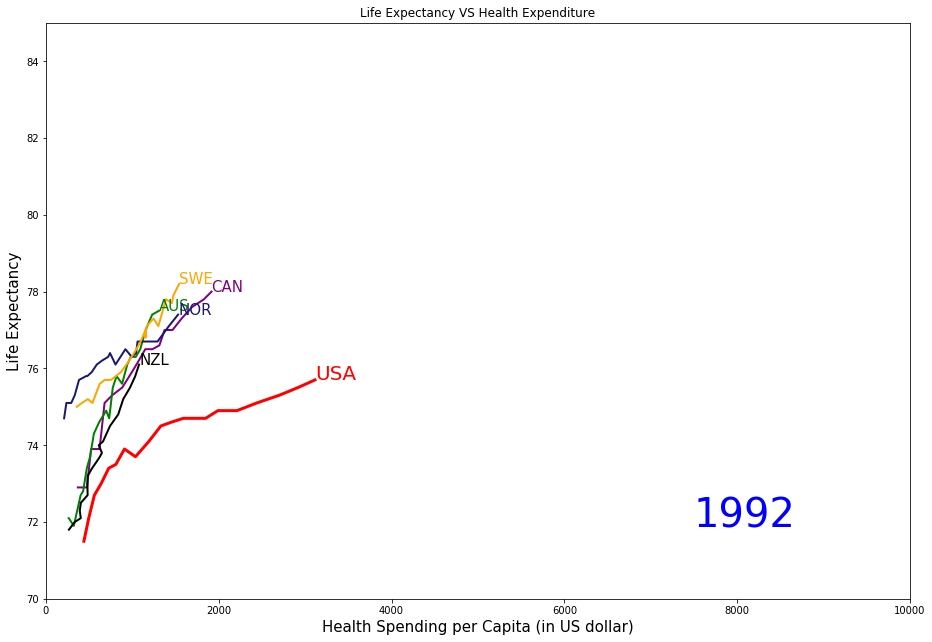

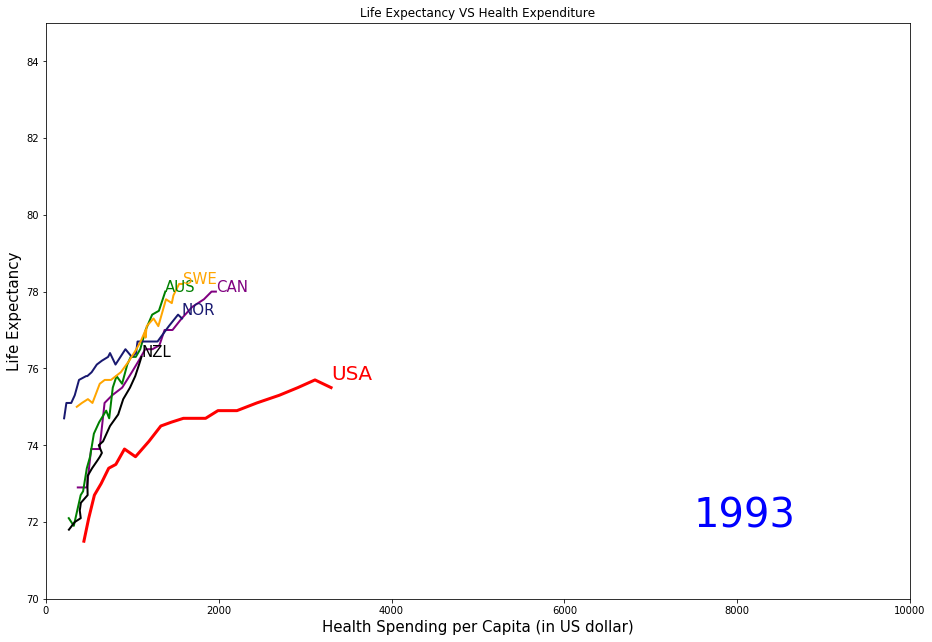

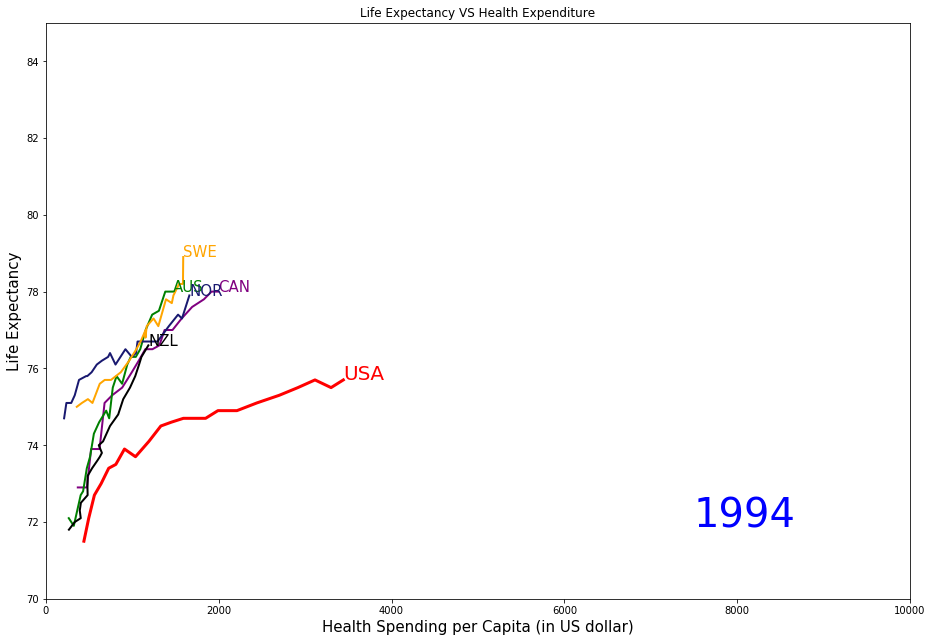

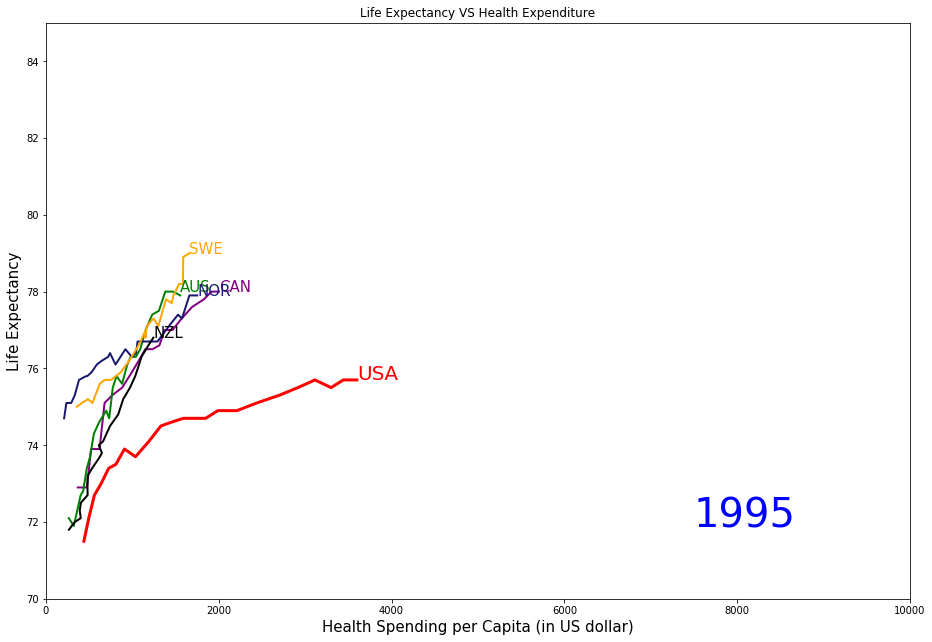

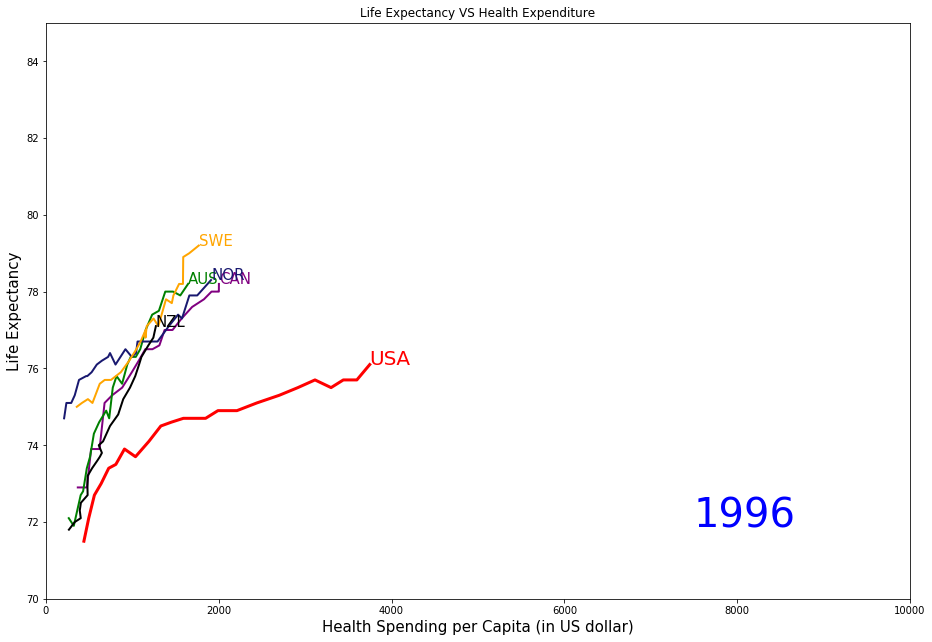

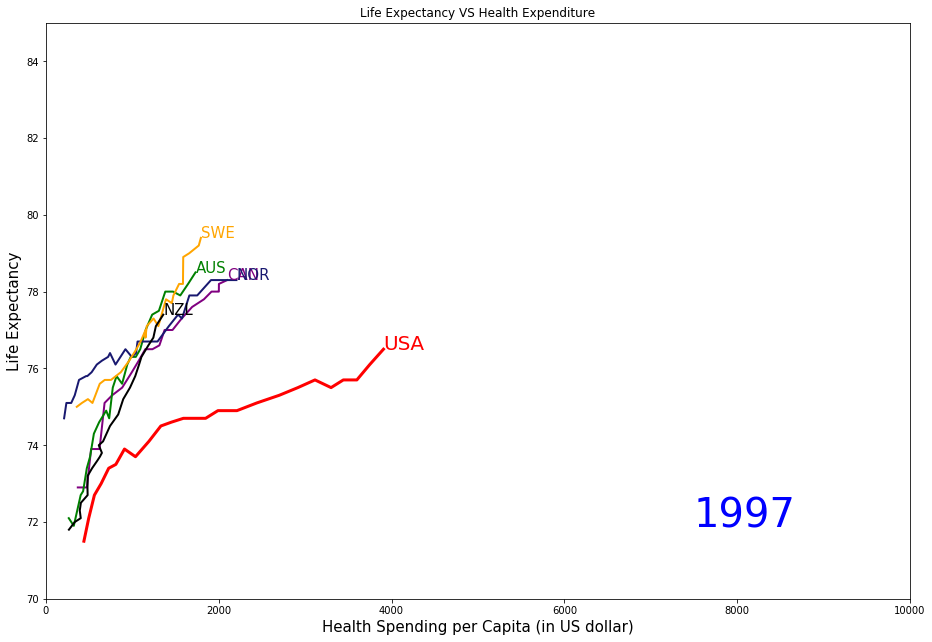

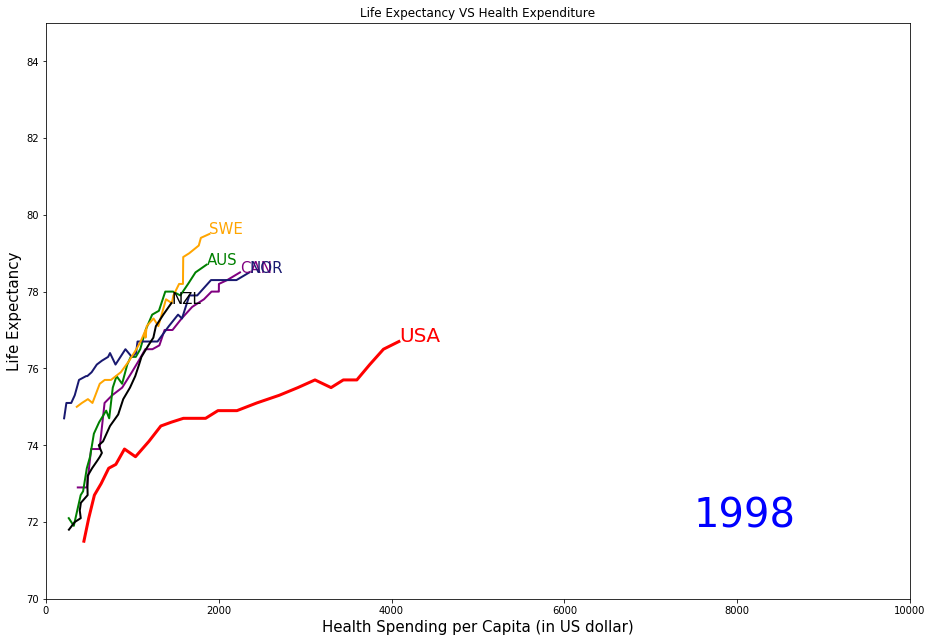

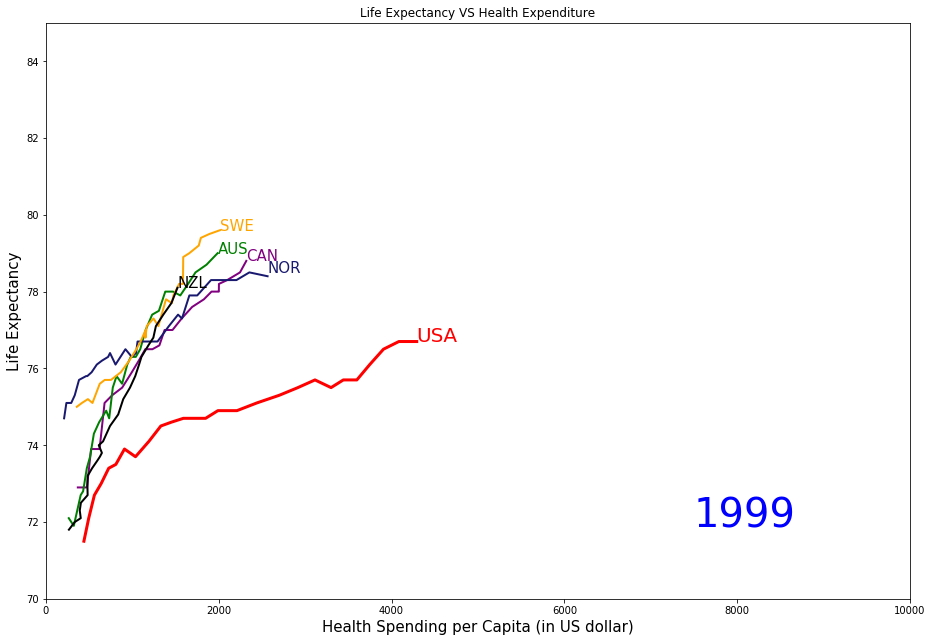

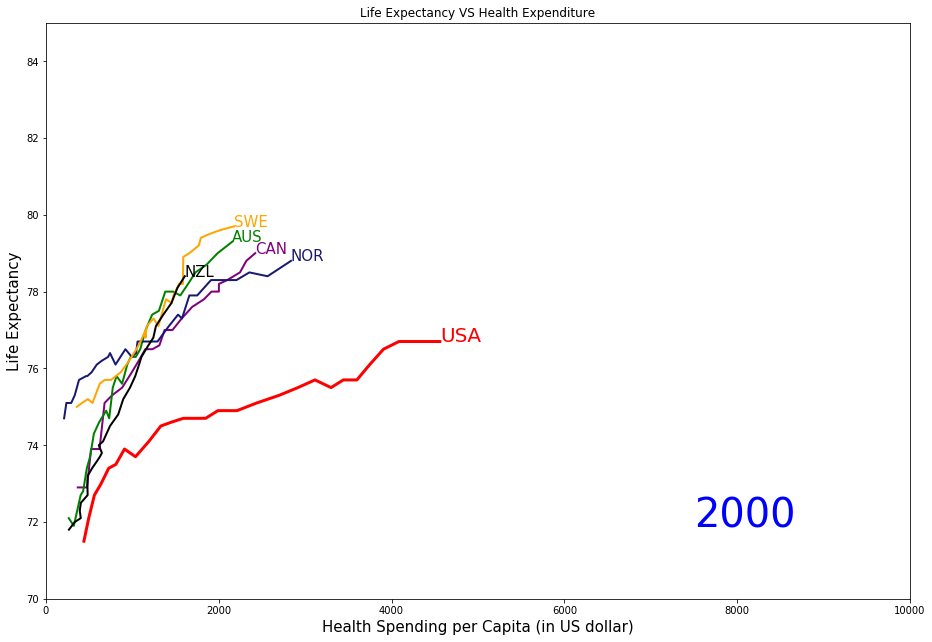

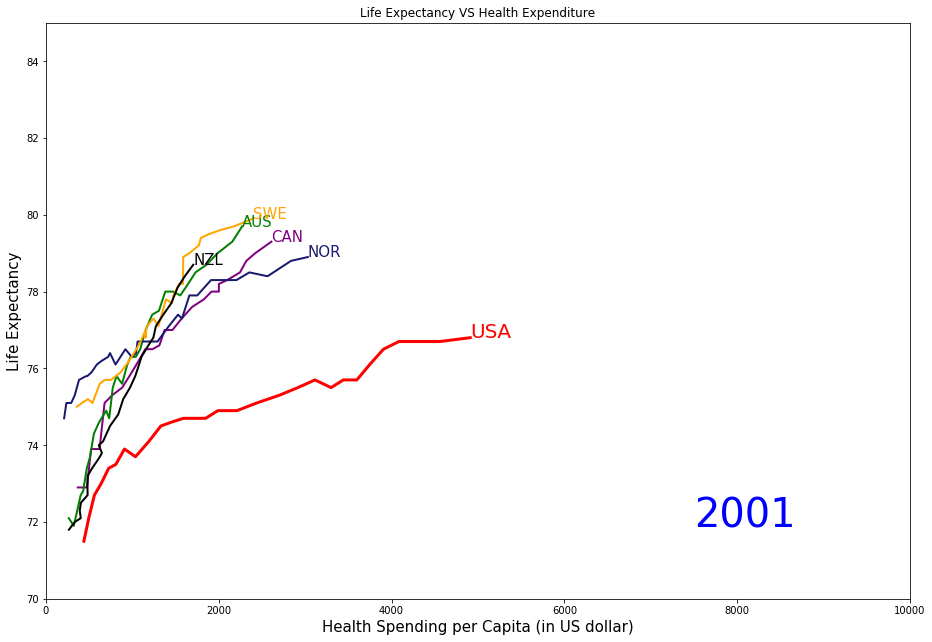

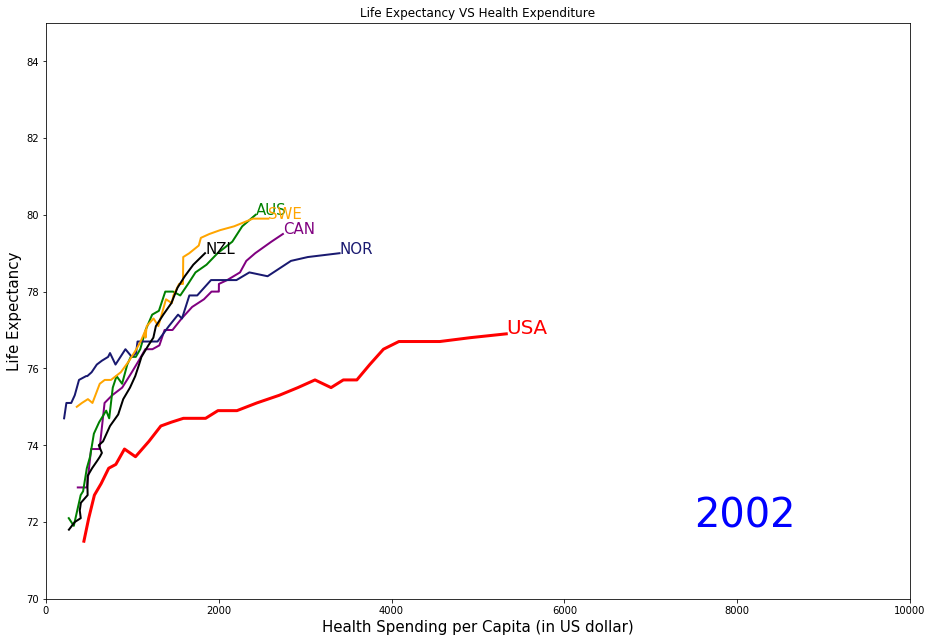

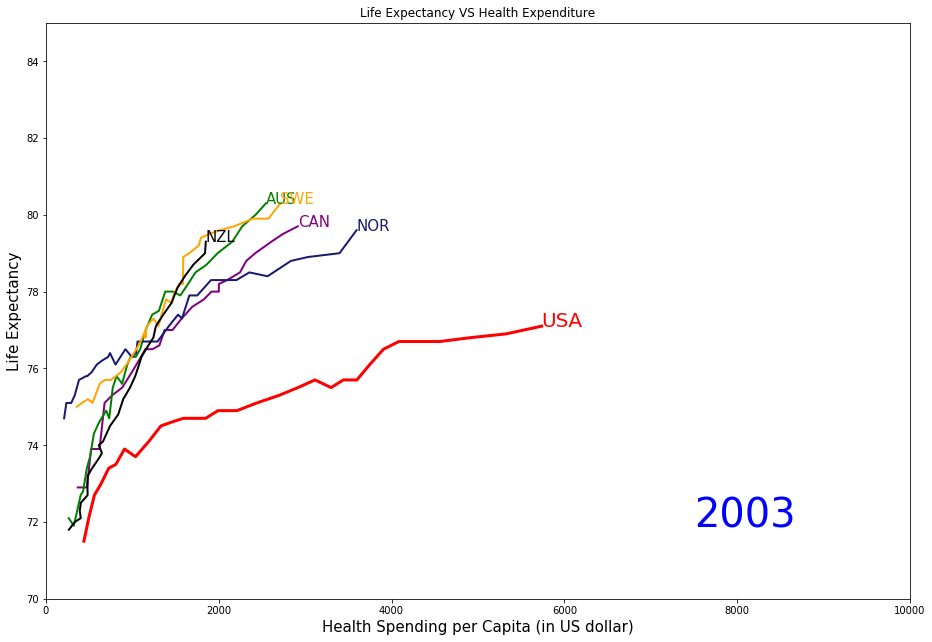

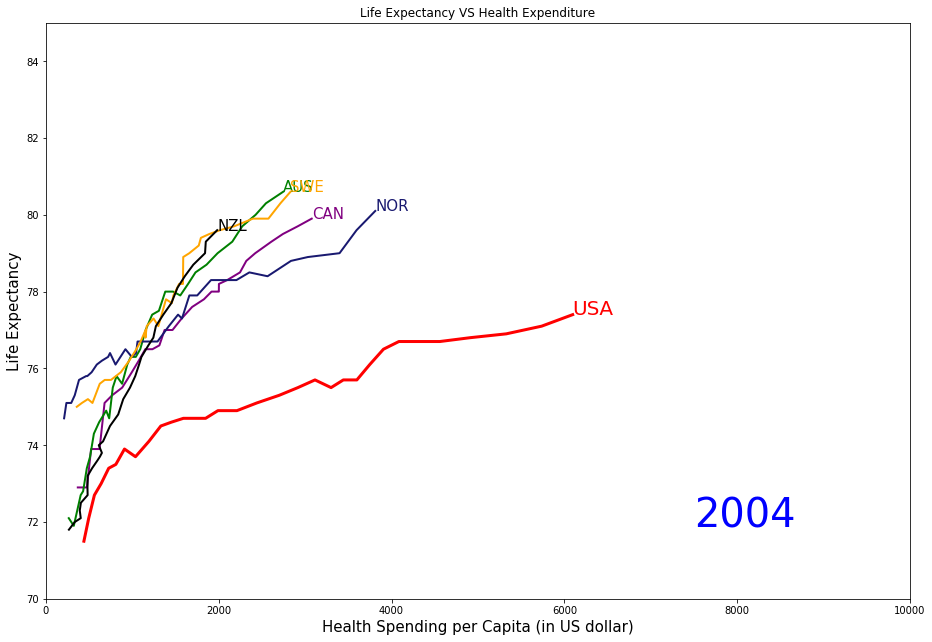

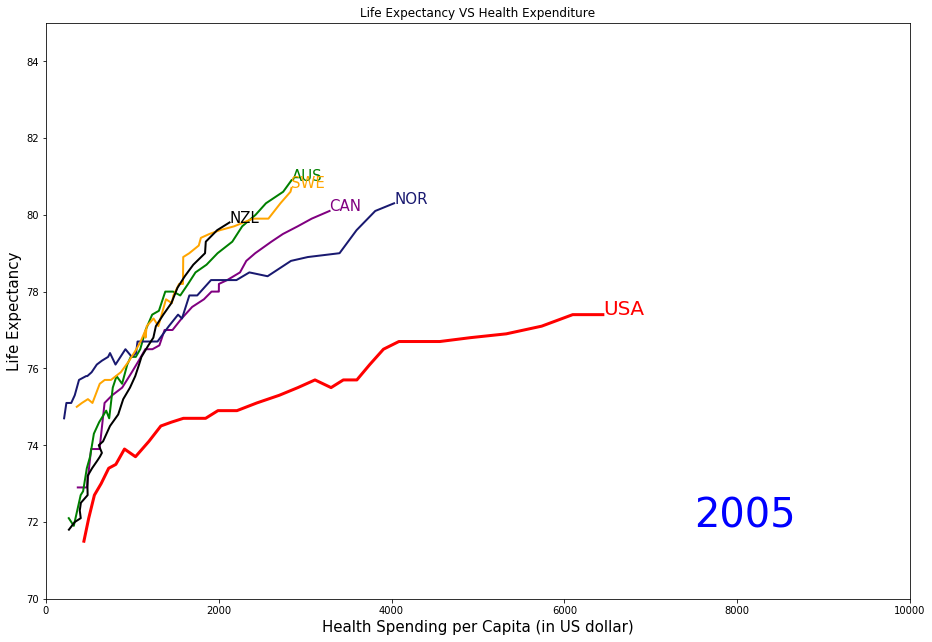

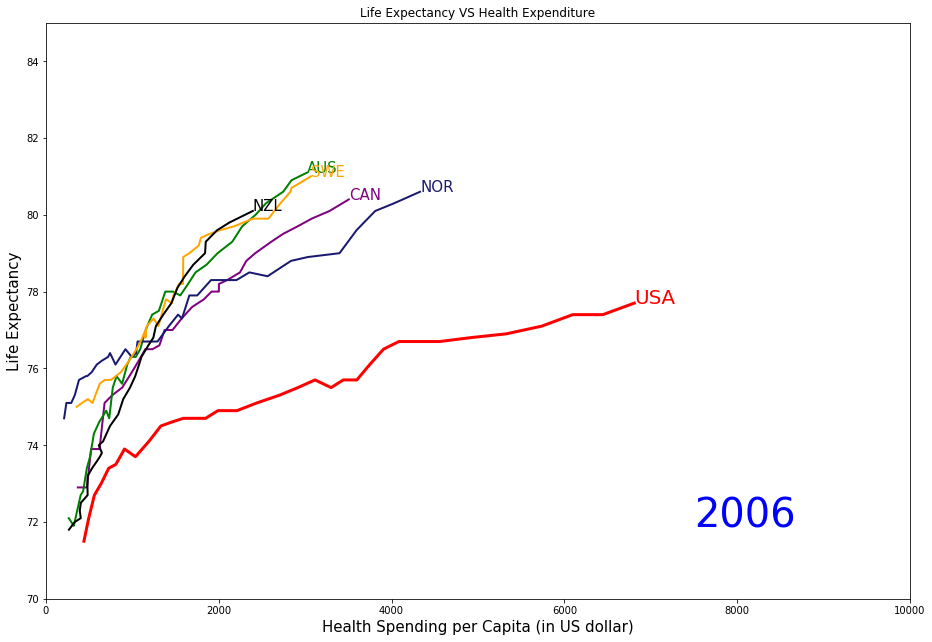

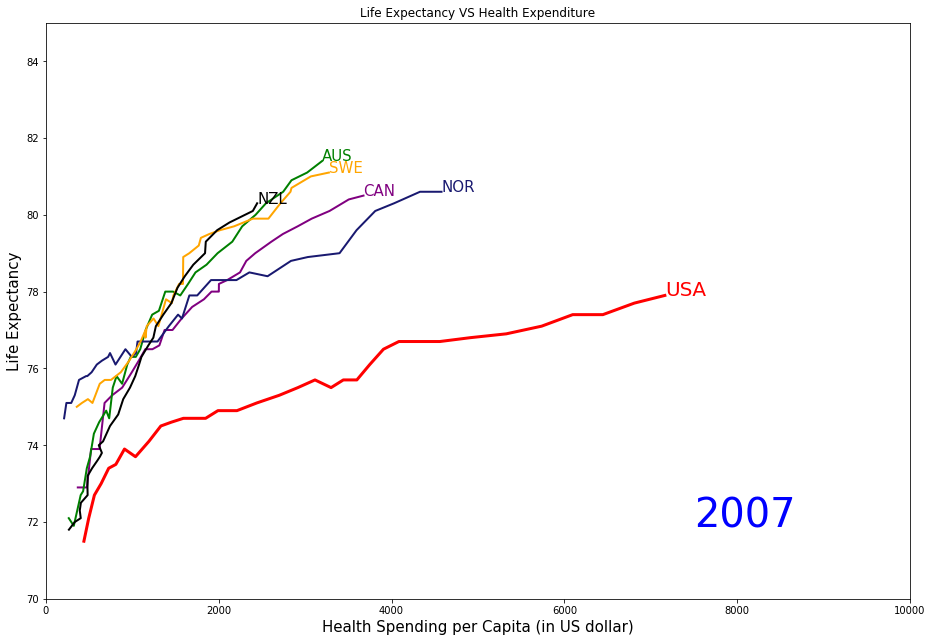

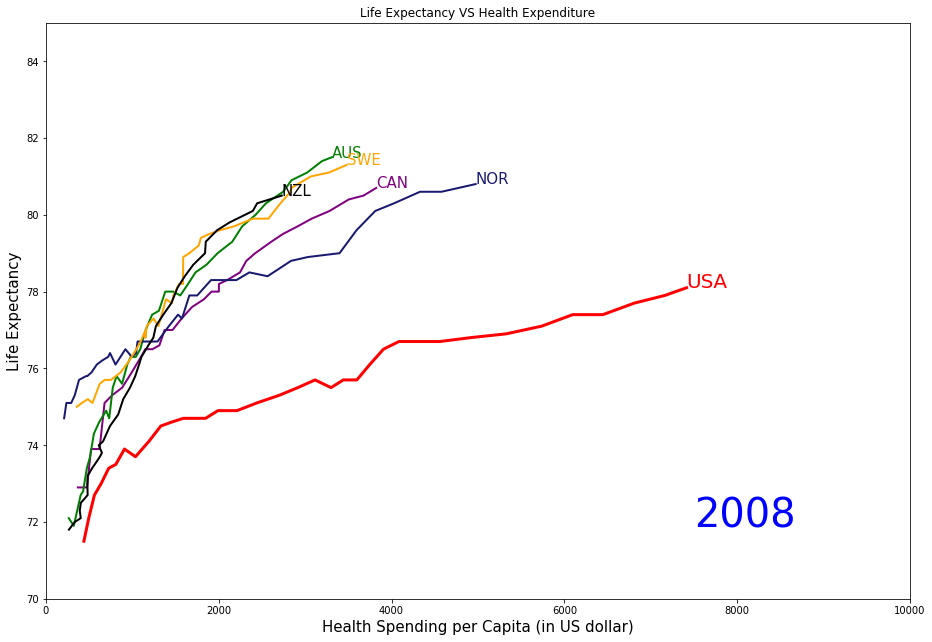

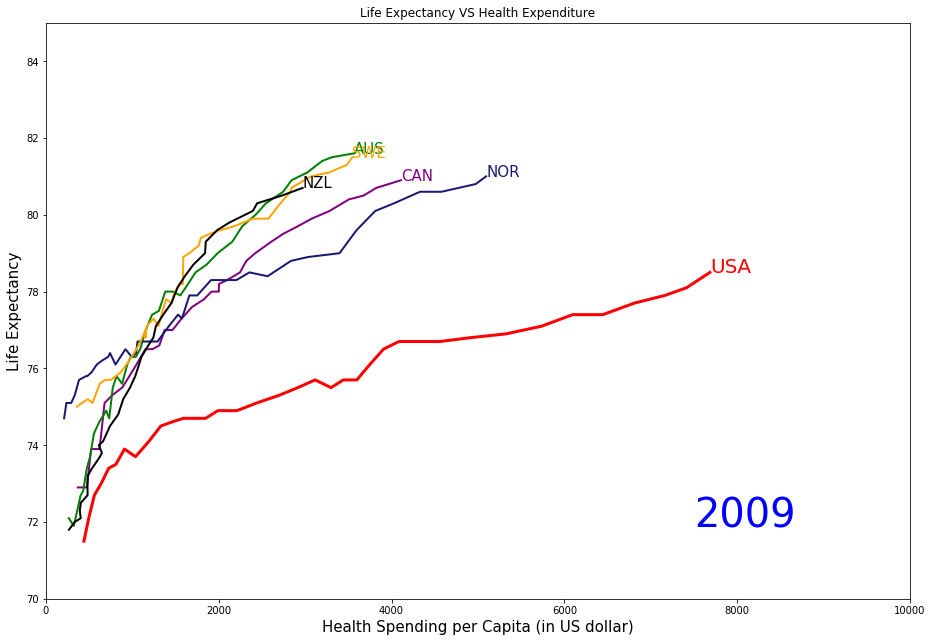

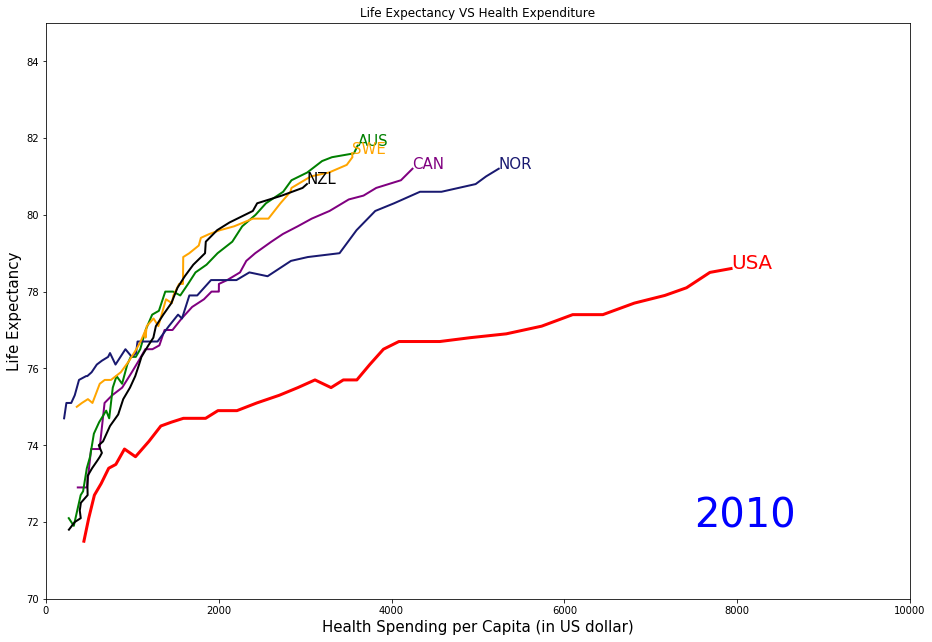

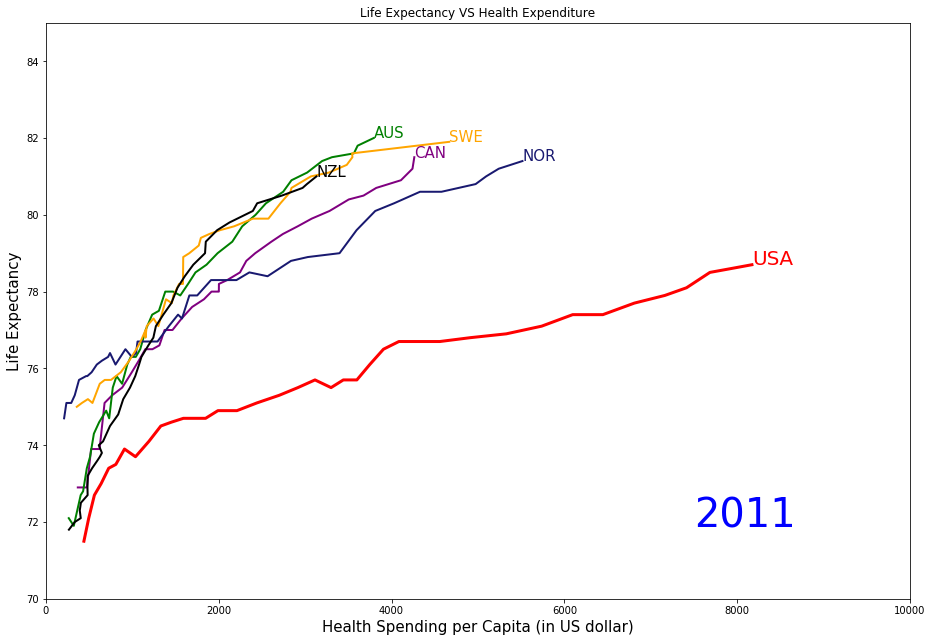

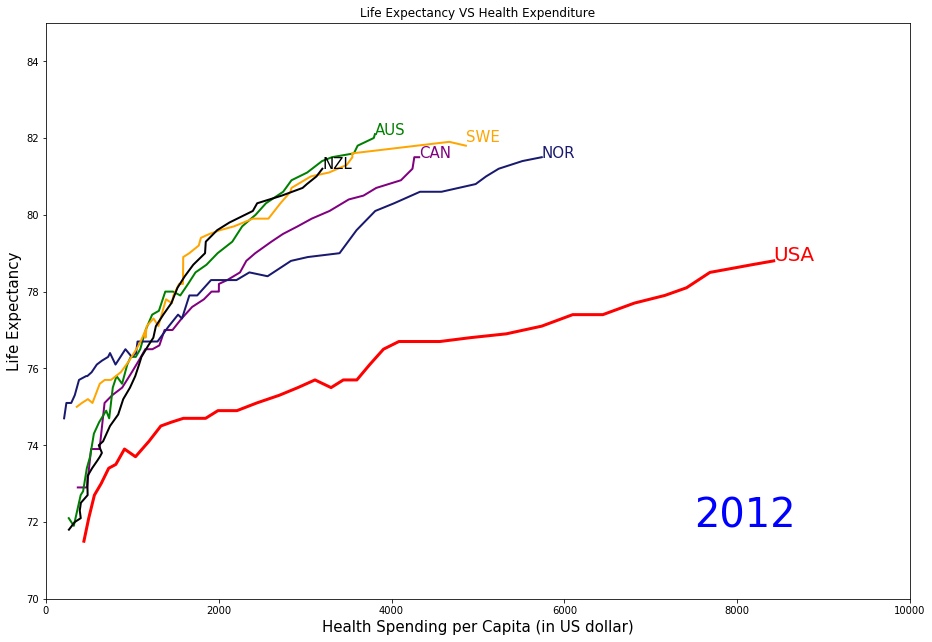

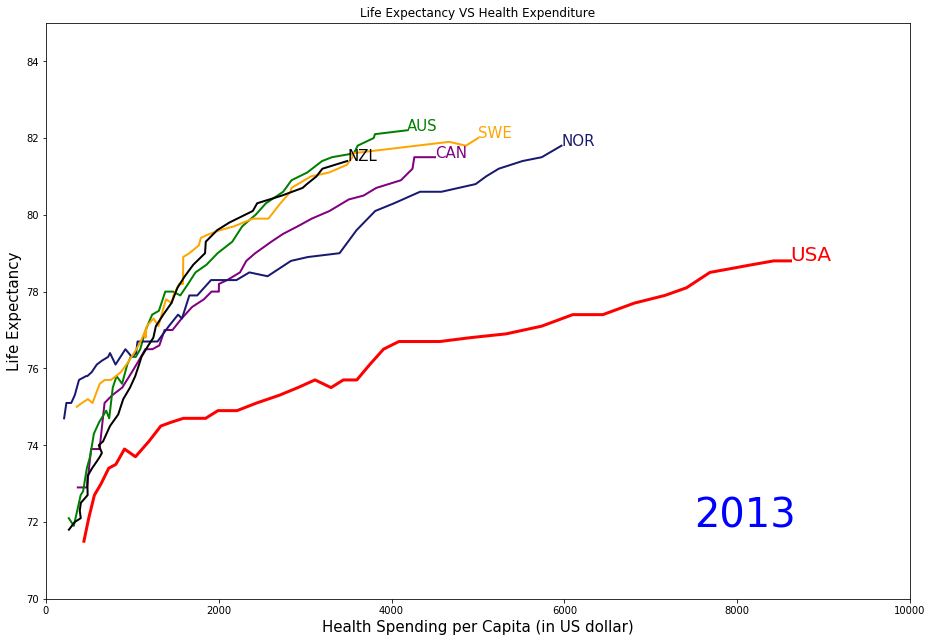

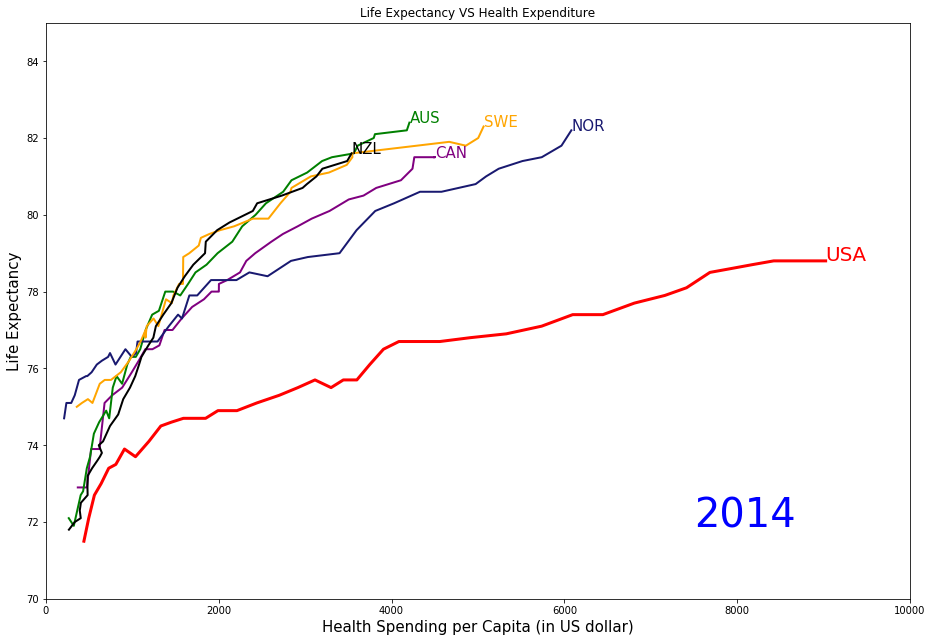

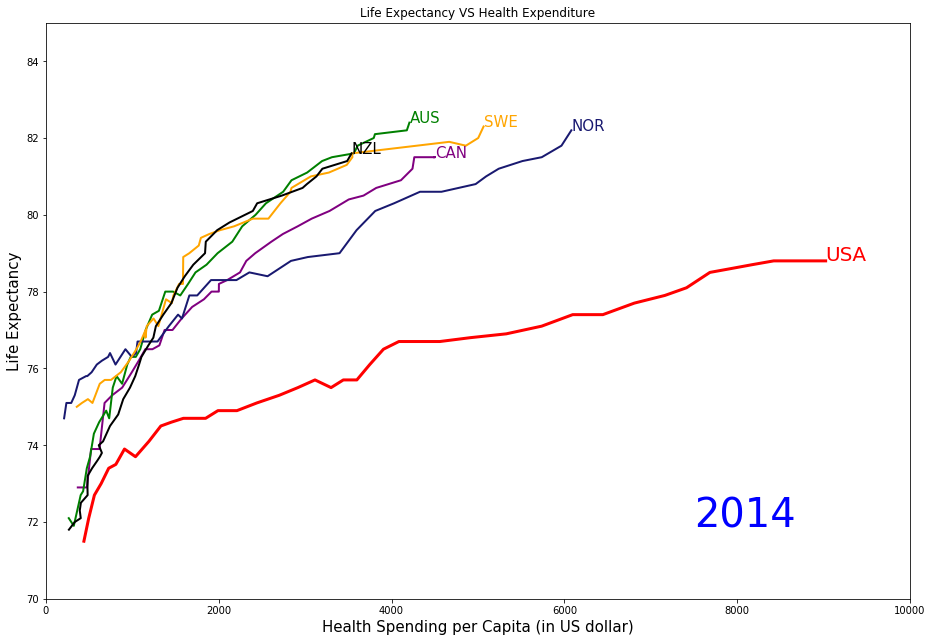

In [45]:
for yr in year:
    US_data = final_data[final_data['LOCATION'] == 'USA']
    US_data = US_data[US_data['Year'] < yr]
    CAN_data1 = CAN_data[CAN_data['Year'] < yr]
    AUS_data = final_data[final_data['LOCATION'] == 'AUS']
    AUS_data = AUS_data[AUS_data['Year'] < yr]
    NOR_data = final_data[final_data['LOCATION'] == 'NOR']
    NOR_data = NOR_data[NOR_data['Year'] < yr]
    SWE_data = final_data[final_data['LOCATION'] == 'SWE']
    SWE_data = SWE_data[SWE_data['Year'] < yr]
    NLD_data = final_data[final_data['LOCATION'] == 'NLD']
    NLD_data = NLD_data[NLD_data['Year'] < yr]
    FRA_data = final_data[final_data['LOCATION'] == 'FRA']
    FRA_data = FRA_data[FRA_data['Year'] < yr]
    NZL_data = final_data[final_data['LOCATION'] == 'NZL']
    NZL_data = NZL_data[NZL_data['Year'] < yr]
    text = US_data['Year'].max()
    fig = plt.figure(figsize = [15,10])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlim(0,10000)
    axes.set_ylim(70,85)
    axes.set_xlabel('Health Spending per Capita (in US dollar)', size = 15)
    axes.set_ylabel('Life Expectancy', size = 15)
    fig.text(x = 0.7, y = 0.2, s = text, size=40, color = 'blue')
    #axes.title(0.5,1,'Life Expectancy VS Health Expenditure')
    #fig.title('Life Expectancy VS Health Expenditure')
    axes.plot(US_data['Cost'],US_data['Expectancy'], label = 'USA', color = 'r', linewidth = 3)
    axes.annotate(s = 'USA', xy = (US_data['Cost'].max(),US_data['Expectancy'].max()), color = 'r', size =20)
    axes.plot(CAN_data1['Cost'],CAN_data1['Expectancy'], label = 'Canada', color = 'purple',linewidth = 2)
    axes.annotate(s = 'CAN', xy = (CAN_data1['Cost'].max(),CAN_data1['Expectancy'].max()), color = 'purple', size =15)
    axes.plot(AUS_data['Cost'],AUS_data['Expectancy'], label = 'Australia', color = 'g', linewidth = 2)
    axes.annotate(s = 'AUS', xy = (AUS_data['Cost'].max(),AUS_data['Expectancy'].max()), color = 'g', size =15)
    axes.plot(NOR_data['Cost'],NOR_data['Expectancy'], label = 'Norway', color = 'midnightblue', linewidth = 2)
    axes.annotate(s = 'NOR', xy = (NOR_data['Cost'].max(),NOR_data['Expectancy'].max()), color = 'midnightblue', size = 15)
    axes.plot(SWE_data['Cost'],SWE_data['Expectancy'], label = 'Sweden', color = 'orange', linewidth = 2)
    axes.annotate(s = 'SWE', xy = (SWE_data['Cost'].max(),SWE_data['Expectancy'].max()), color = 'orange', size =15)
    axes.plot(NZL_data['Cost'],NZL_data['Expectancy'], label = 'New Zealand', color = 'black', linewidth = 2)
    axes.annotate(s = 'NZL', xy = (NZL_data['Cost'].max(),NZL_data['Expectancy'].max()), color = 'black', size =15)
    path = ("Spend_{}.jpeg".format(yr))
    plt.title("Life Expectancy VS Health Expenditure")
    fig.savefig(path, bbox = 'tight')

In [42]:
 path = ("Spend_{}.jpeg".format(yr))

In [43]:
import imageio as io

In [46]:
images = []
for yr in year:
    images.append(io.imread("Spend_{}.jpeg".format(yr)))
io.mimsave('expectancyVSspending.gif', images, duration = 0.4)

In [ ]:
final_data['LOCATION'].unique()

In [ ]:
life_expect[life_expect['LOCATION'] == 'CAN']['Year']

In [ ]:
life_expect.set_index('Year')

In [ ]:
life_expect.index = pd.DatetimeIndex(life_expect.index)

In [ ]:
CAN_data

In [ ]:
can_year = CAN_data.Year

In [ ]:
can_year

In [ ]:
can_value = CAN_data.Cost 

In [ ]:
new_year = []
for i,x in enumerate(can_year):
    j = int(x)
    new_year.append(x)
    j+= 1
    if j not in can_year:
        new_year.append(j)

print(new_year)

In [ ]:
year

In [ ]:
new_value = []
for i,x in enumerate(can_value):
    j = int(x)
    new_value.append(x)
    if j not in can_year:
        new_value.append(j)
        
print(new_value)


In [ ]:
data = (can_year, can_expectancy)

In [ ]:
data = {'year' : new_year, 'value':new_value, 'Location':'CAN'}

In [ ]:
data = pd.DataFrame(data)
data

In [ ]:
i,x in enumerate(total_years)

In [ ]:
data

In [ ]:
#can_year

In [ ]:
can_expectancy

In [ ]:
CAN_data.set_index('Year', inplace= True)

In [ ]:
can_year = CAN_data.index

In [ ]:
can_year

In [ ]:
total_years = range(1961,2015)
new_year = []
for i,x in enumerate(total_years):
    j = int(x)
    new_year.append(x)
    j+= 1
    if j not in total_years:
        new_year.append(j)

print(new_year)
len(new_year)

In [ ]:

new_value = []
for i,x in enumerate(can_expectancy):
    j = float(x)
    new_value.append(x)
    if j not in new_year:
        new_value.append(j)
        
print(new_value)
len(new_value)

In [ ]:
mean_expentency=CAN_data['Expectancy'].mean()
mean_expentency

In [ ]:
CAN_data

In [ ]:
year = 1961
j = 165

list_year=CAN_data["Year"].tolist()

print(list_year)

for year in range(1961,2015):
    if year not in list_year:
        print(year)
        CAN_data=CAN_data.append({'LOCATION':'CAN','Year':year}, ignore_index=True)
        
        
CAN_data
  

In [ ]:
CAN_data.sort_values('Year', inplace= True)

In [ ]:
CAN_data.fillna(method = 'ffill', inplace= True)

In [ ]:
CAN_data

In [ ]:
CAN_data = CAN_data[CAN_data['Year'] > 1972]

In [ ]:
CAN_data

In [ ]:
health_spend_new[health_spend_new['LOCATION'] == 'CAN']

In [ ]:
CAN_data = pd.merge(CAN_data, health_spend_new[health_spend_new['LOCATION'] == 'CAN'], how= "inner", on = fil)

In [ ]:
health_spend_new[health_spend_new['LOCATION'] == 'CAN' ]

In [ ]:
CAN_data

In [ ]:
US_data

In [ ]:
CAN_data